<div style="background-color:#e0f7fa; border-left: 8px solid #00796b; padding: 20px; margin: 20px 0; border-radius: 8px;">
    <h1 style="text-align:center; color:#004d40; font-size: 28px; margin-bottom: 10px;">Tesla Autonomous Deaths: Comparative Safety And 
Root-Cause Analysis</h1>
    <h3 style="text-align:center; color:#00695c;">August 10, 2025</h3>
    <hr style="border-top: 1px solid #004d40;">
    <p style="font-size: 16px; line-height: 1.5; color:#333;">
    This project analyzes 294 fatal Tesla crashes from 2013 to 2023 to compare crash patterns between Autopilot/FSD and manual driving. Using statistical and natural language analysis, it identifies key differences in crash causes and provides safety-focused recommendations, highlighting the need for better driver monitoring, enhanced Autopilot handling, and improved data transparency from Tesla.
    </p>
    <p style="font-size: 16px; color:#555;"><b>Contributors:</b> Ato Kwamena Essiem, Charles Ifeanyi Okpala, Jonada Golemaj, Mayra Geraldine Reinoso Varon & Naveen Karan Krishna</p>
</div>

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">1. Import Libraries</h2>
</div>

In [29]:
# Data Handling
import pandas as pd
import numpy as np
import re

# Visualization
import matplotlib.pyplot as plt
import calendar
import missingno as msno
import seaborn as sns
from wordcloud import WordCloud

# Natural Language Processing (NLP)
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Preprocessing & Utilities
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

# Statistical Analysis
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\navee\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\navee\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\navee\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\navee\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">2. Data Loading and Exploring</h2>
</div>

In [31]:
# Load the dataset
df = pd.read_csv('Tesla Deaths - Deaths.csv')

# Preview the dataset
df.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2023.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
1,293.0,2023.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292.0,2023.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN,NaN,NaN,NaN,NaN
4,290.0,2022.0,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,...,-,-,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,NaN,NaN,NaN,NaN,NaN


In [32]:
# To understand the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 24 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Case #                                                                294 non-null    float64
 1   Year                                                                  294 non-null    float64
 2   Date                                                                  294 non-null    object 
 3    Country                                                              294 non-null    object 
 4    State                                                                294 non-null    object 
 5    Description                                                          295 non-null    object 
 6    Deaths                                                               299 non-null    float64
 7  

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">3. Data Cleaning</h2>
</div>

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h3 style="color:#33691e; margin-top:0;">3.1 Cleaning Column Names</h3>
</div>

In [35]:
# Strip whitespace and replace spaces with underscores in column names
df.columns = [col.strip().replace(" ", "_") for col in df.columns]

# Preview the changed column names
df.head()

,Case_#,Year,Date,Country,State,Description,Deaths,Tesla_driver,Tesla_occupant,Other_vehicle,...,Verified_Tesla_Autopilot_Deaths,Verified_Tesla_Autopilot_Deaths_+_All_Deaths_Reported_to_NHTSA_SGO,Unnamed:_16,Unnamed:_17,Source,Note,Deceased_1,Deceased_2,Deceased_3,Deceased_4
0,294.0,2023.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
1,293.0,2023.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292.0,2023.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN,NaN,NaN,NaN,NaN
4,290.0,2022.0,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,...,-,-,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,NaN,NaN,NaN,NaN,NaN


<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h3 style="color:#33691e; margin-top:0;">3.2 Removing Unnecessary Columns</h3>
</div>

In [37]:
# Drop unnecessary columns
columns_to_drop = [
    'Case_#', 'Year', 'Unnamed:_16', 'Unnamed:_17',
    'Autopilot_claimed', 'Verified_Tesla_Autopilot_Deaths',
    'Source', 'Note', 'Deceased_1', 'Deceased_2', 'Deceased_3', 'Deceased_4'
]

df.drop(columns=columns_to_drop, inplace=True)

# Previewing the dataset after dropping columns
df.head()

,Date,Country,State,Description,Deaths,Tesla_driver,Tesla_occupant,Other_vehicle,Cyclists/_Peds,TSLA+cycl_/_peds,Model,Verified_Tesla_Autopilot_Deaths_+_All_Deaths_Reported_to_NHTSA_SGO
0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,-,1,-,-
1,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,-,1,-,-
2,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,-,1,-,-
3,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,-,1,-,-
4,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,1,1,-,-


<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h3 style="color:#33691e; margin-top:0;">3.3 Renaming Columns</h3>
</div>

In [39]:
# Renaming the column names as necessary
df.columns = ['Date','Country','State','Description','Deaths',"Tesla_driver","Tesla_occupant","Other_vehicle","Cyclists/Peds","TSLA+cycl/peds","Model","Autopilot_Deaths"]

# Previewing the dataframe after name change
df.head()

,Date,Country,State,Description,Deaths,Tesla_driver,Tesla_occupant,Other_vehicle,Cyclists/Peds,TSLA+cycl/peds,Model,Autopilot_Deaths
0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,-,1,-,-
1,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,-,1,-,-
2,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,-,1,-,-
3,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,-,1,-,-
4,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,1,1,-,-


<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h3 style="color:#33691e; margin-top:0;">3.4 Handling Missing Data</h3>
</div>

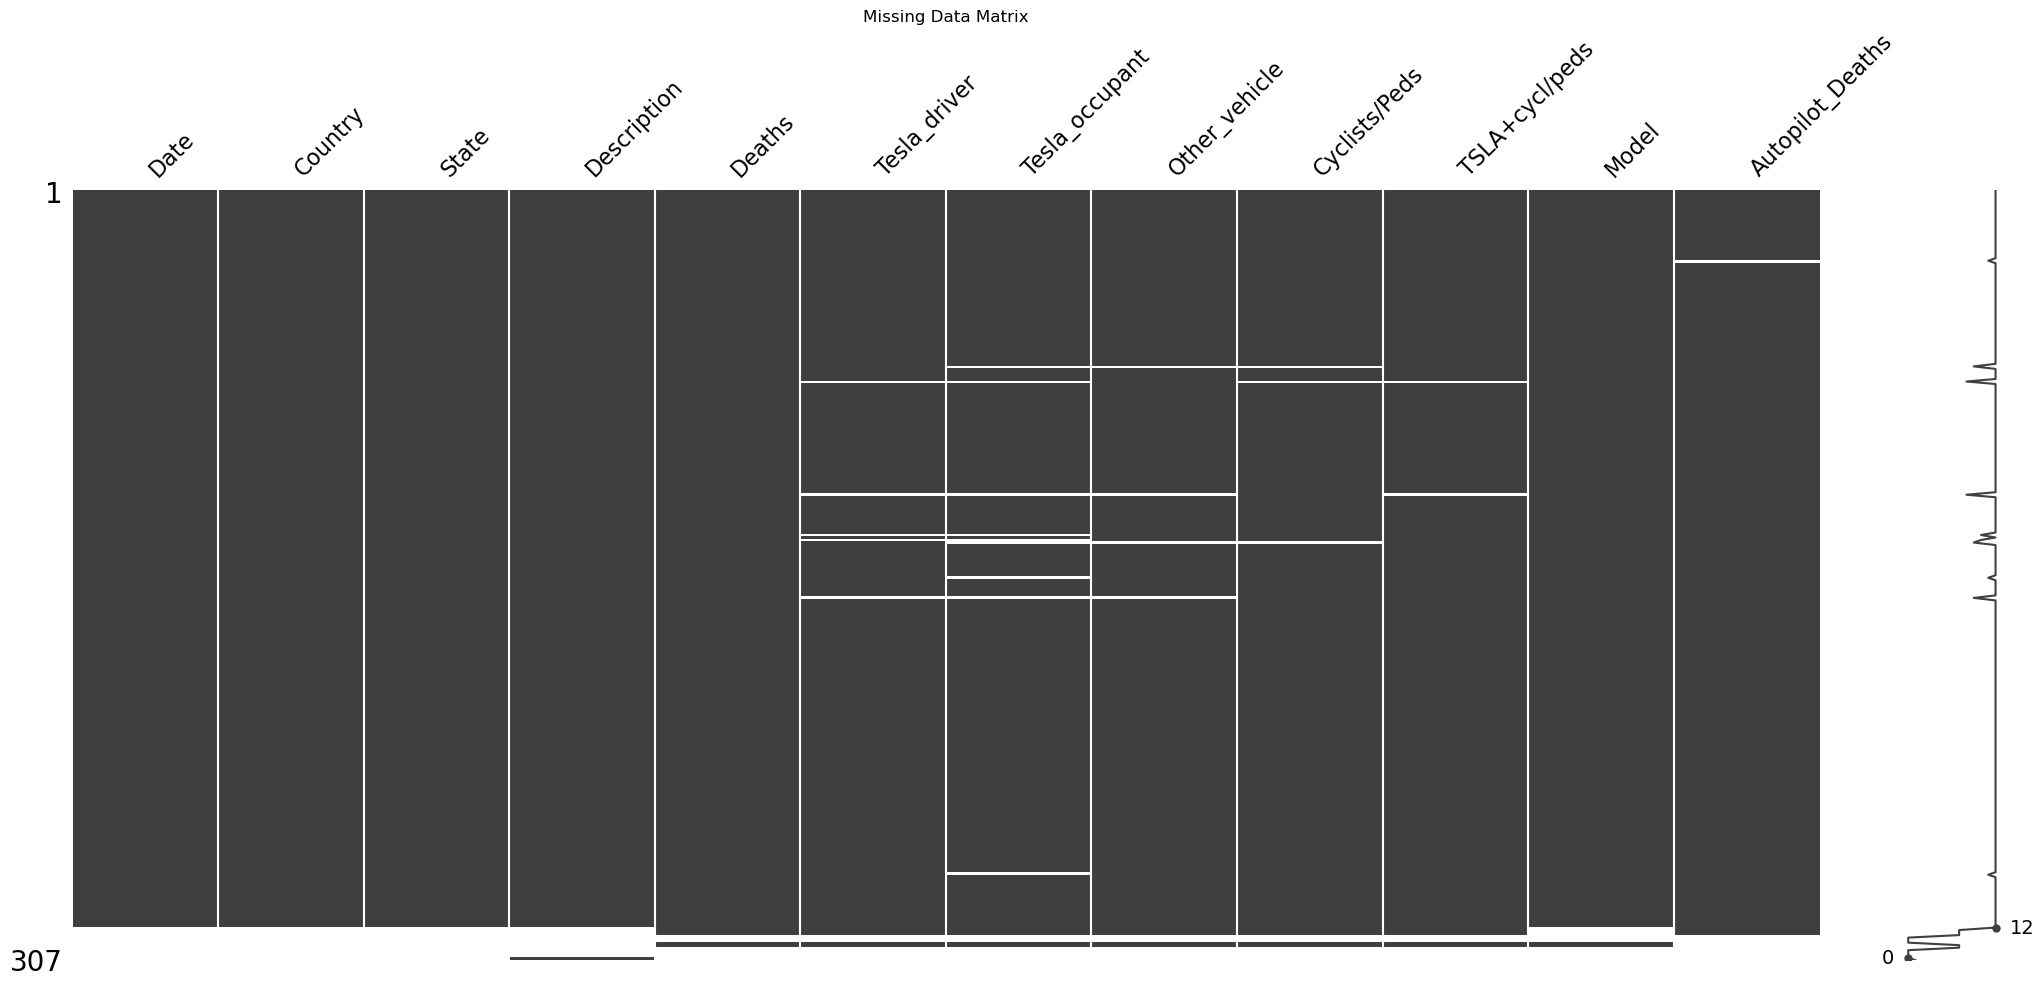

In [41]:
# Visualize missing data
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()

In [42]:
# Total missing values
missing_values = df.isnull().sum().to_frame(name='Missing Values').transpose()
missing_values

,Date,Country,State,Description,Deaths,Tesla_driver,Tesla_occupant,Other_vehicle,Cyclists/Peds,TSLA+cycl/peds,Model,Autopilot_Deaths
Missing Values,13,13,13,12,8,13,17,12,11,10,11,11


In [43]:
# Fill the empty record in the columns with '-'
columns_to_fill = [
    'Tesla_driver', 'Tesla_occupant', 'Other_vehicle',
    'Cyclists/Peds', 'TSLA+cycl/peds',
    'Autopilot_Deaths'
]

df[columns_to_fill] = df[columns_to_fill].fillna(" - ")

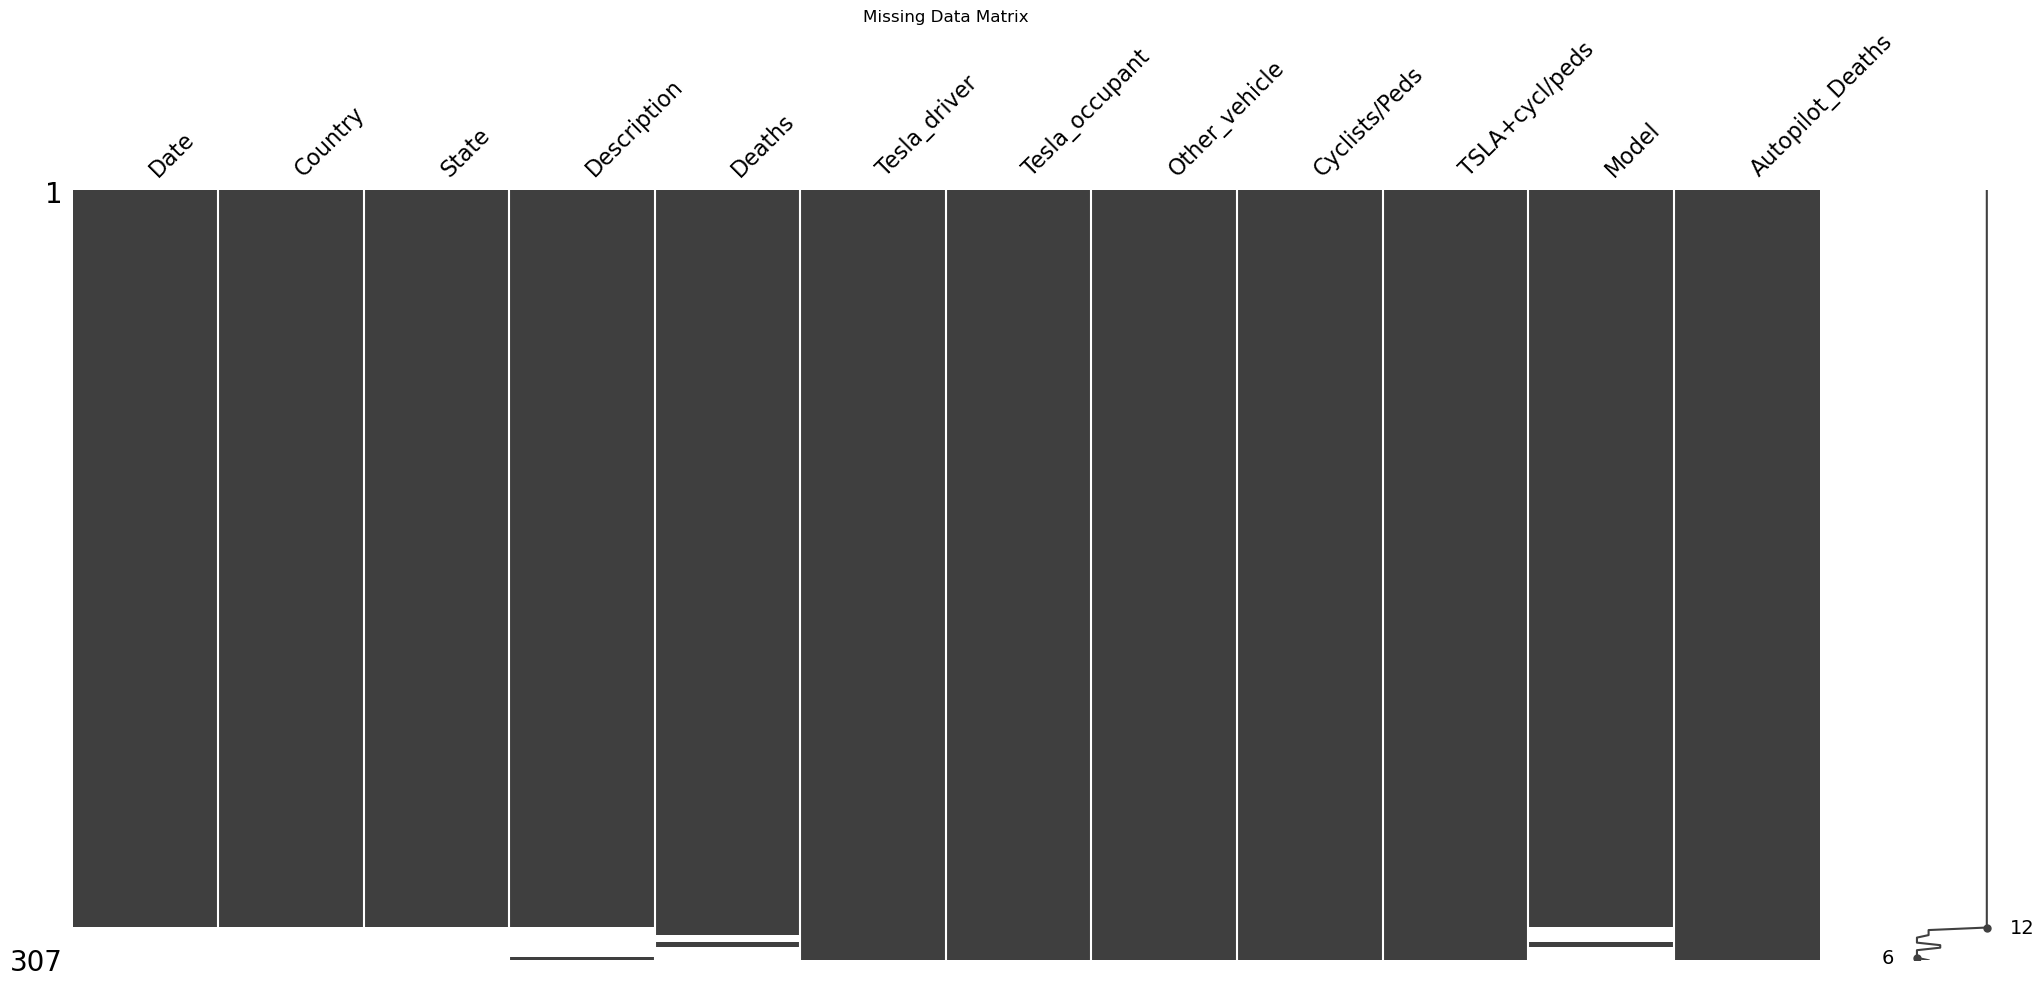

In [44]:
# Visualize missing data after filling
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()

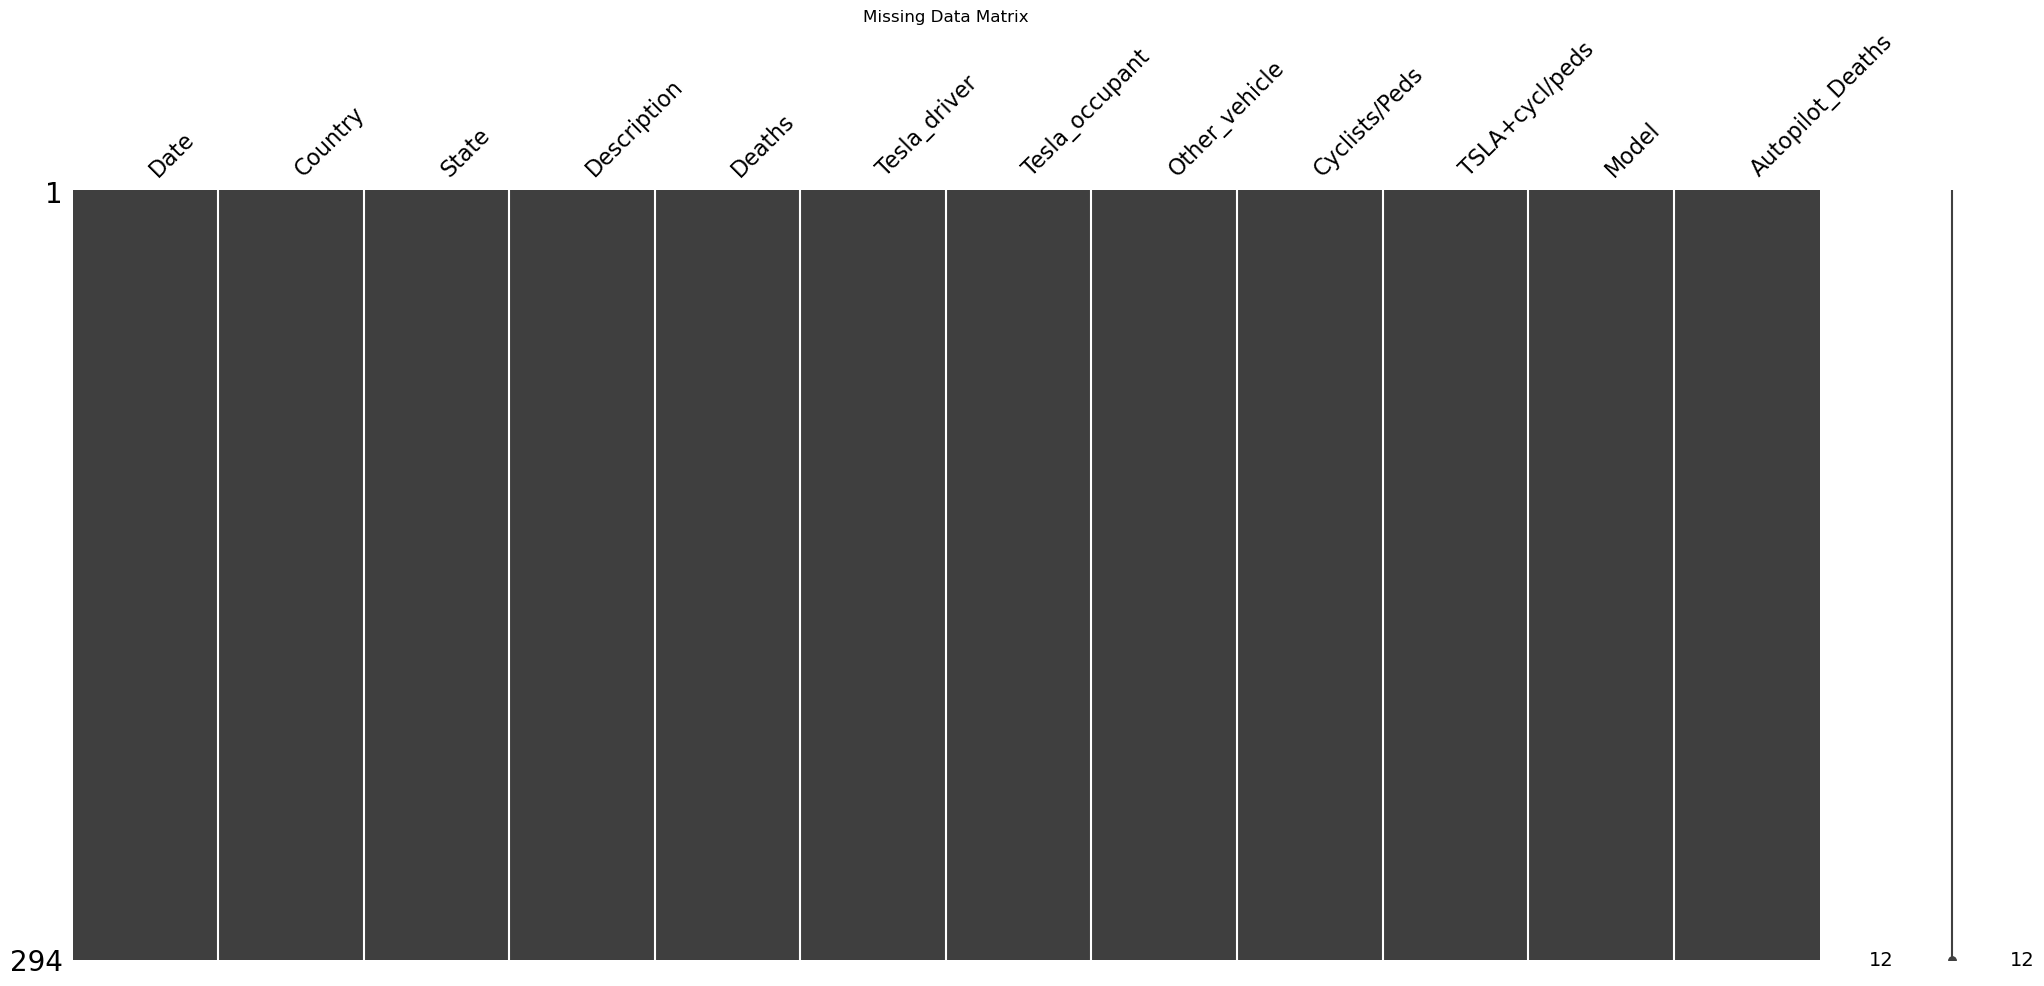

In [45]:
# Dropping the missing values
df = df.dropna()

# Visualize missing data after dropping
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()

In [46]:
# To verify there is no missing values in the dataframe
df.isnull().sum().to_frame(name='Missing Value').transpose()

,Date,Country,State,Description,Deaths,Tesla_driver,Tesla_occupant,Other_vehicle,Cyclists/Peds,TSLA+cycl/peds,Model,Autopilot_Deaths
Missing Value,0,0,0,0,0,0,0,0,0,0,0,0


<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">4. Data Preprocessing</h2>
</div>

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h3 style="color:#33691e; margin-top:0;">4.1 Date Conversion & Extraction</h3>
</div>

In [49]:
# Convert 'Date' to datetime and extract only date part (drops time part)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.date

In [50]:
# Extract year, month & day for temporal analysis in EDA
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h3 style="color:#33691e; margin-top:0;">4.2 Data Type Conversion</h3>
</div>

In [52]:
# Convert Deaths column from float to integer
df['Deaths'] = df['Deaths'].astype(int)

In [53]:
# Replacing '-' with 0 for the following columns
columns_to_replace = [
    'Tesla_driver', 'Tesla_occupant', 'Other_vehicle',
    'Cyclists/Peds', 'TSLA+cycl/peds', 'Model', 'Autopilot_Deaths'
]

df[columns_to_replace] = df[columns_to_replace].replace(' - ', 0)

In [54]:
# Coverting numeric columns to integer
columns_to_convert = [
    'Tesla_driver', 'Tesla_occupant', 'Other_vehicle',
    'Cyclists/Peds', 'TSLA+cycl/peds', 'Autopilot_Deaths'
]

df[columns_to_convert] = df[columns_to_convert].astype(int)

In [55]:
# Previewing the dataset after dtype conversion
df.head()

,Date,Country,State,Description,Deaths,Tesla_driver,Tesla_occupant,Other_vehicle,Cyclists/Peds,TSLA+cycl/peds,Model,Autopilot_Deaths,Year,Month,Day
0,2023-01-17,USA,CA,Tesla crashes into back of semi,1,1,0,0,0,1,0,0,2023,1,17
1,2023-01-07,Canada,-,Tesla crashes,1,1,0,0,0,1,0,0,2023,1,7
2,2023-01-07,USA,WA,"Tesla hits pole, catches on fire",1,0,1,0,0,1,0,0,2023,1,7
3,2022-12-22,USA,GA,Tesla crashes and burns,1,1,0,0,0,1,0,0,2022,12,22
4,2022-12-19,Canada,-,Tesla crashes into storefront,1,0,0,0,1,1,0,0,2022,12,19


<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h3 style="color:#33691e; margin-top:0;">4.3 Validation of Aggregate Columns</h3>
</div>

In [57]:
# Sum of Deaths Column
print("Sum of Deaths Column:", df['Deaths'].sum())

# Sum of Total Deaths from other type of death columns
Total_Deaths = df['Tesla_driver'] + df['Tesla_occupant'] + df['Other_vehicle'] + df['Cyclists/Peds']
print("Sum of Total Deaths:", Total_Deaths.sum())

Sum of Deaths Column: 353
Sum of Total Deaths: 341


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">
There is a difference in the total between summing the deaths column and the total of Tesla_driver, Tesla_occupant, Other_vehicle and Cyclists/Peds

In [59]:
# Replace the 'Deaths' column with row-wise sum
death_components = [
    'Tesla_driver',
    'Tesla_occupant',
    'Other_vehicle',
    'Cyclists/Peds'
]

df['Deaths'] = df[death_components].sum(axis=1)

# Removing the records that has Zero Deaths
df = df[df['Deaths'] != 0]

# Sum of Deaths Column
print("Sum of Deaths Column After Recalculation:", df['Deaths'].sum())

Sum of Deaths Column After Recalculation: 341


In [60]:
# Sum of TSLA + cycl/peds Column
print("Sum of Tesla + Cyclist/pedestrian Column:", df['TSLA+cycl/peds'].sum())

# Sum of Total Deaths from other type of death columns
Sum_Deaths = df['Tesla_driver'] + df['Tesla_occupant'] + df['Cyclists/Peds']
print("Sum of Total Tesla and Cyclists/Pedestrian Deaths:", Sum_Deaths.sum())

Sum of Tesla + Cyclist/pedestrian Column: 200
Sum of Total Tesla and Cyclists/Pedestrian Deaths: 211


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">
There is a difference in the total between summing the TSLA+cycl/peds column and the total of Tesla_driver, Tesla_occupant and Cyclists/Peds column.

In [62]:
# Replace the 'TSLA+cycl/peds' column with row-wise sum
death_types = [
    'Tesla_driver',
    'Tesla_occupant',
    'Cyclists/Peds'
]

df['TSLA+cycl/peds'] = df[death_types].sum(axis=1)

# Sum of TSLA + cycl/peds Column
print("Sum of Tesla + Cyclist/pedestrian Column After Recalculation:", df['TSLA+cycl/peds'].sum())

Sum of Tesla + Cyclist/pedestrian Column After Recalculation: 211


In [63]:
# Creating a new column for total deaths in Tesla
df['Tesla_In-Vehicle'] = df['Tesla_driver'] + df['Tesla_occupant']

# Rearrange the Tesla_In-Vehilce column
df = df[['Date', 'Country', 'State', 'Description', 'Deaths', 'Tesla_driver',
         'Tesla_occupant', 'Other_vehicle', 'Cyclists/Peds', 'Tesla_In-Vehicle',
         'TSLA+cycl/peds', 'Model', 'Autopilot_Deaths', 'Year',	'Month', 'Day']]
df.head()

,Date,Country,State,Description,Deaths,Tesla_driver,Tesla_occupant,Other_vehicle,Cyclists/Peds,Tesla_In-Vehicle,TSLA+cycl/peds,Model,Autopilot_Deaths,Year,Month,Day
0,2023-01-17,USA,CA,Tesla crashes into back of semi,1,1,0,0,0,1,1,0,0,2023,1,17
1,2023-01-07,Canada,-,Tesla crashes,1,1,0,0,0,1,1,0,0,2023,1,7
2,2023-01-07,USA,WA,"Tesla hits pole, catches on fire",1,0,1,0,0,1,1,0,0,2023,1,7
3,2022-12-22,USA,GA,Tesla crashes and burns,1,1,0,0,0,1,1,0,0,2022,12,22
4,2022-12-19,Canada,-,Tesla crashes into storefront,1,0,0,0,1,0,1,0,0,2022,12,19


<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">5. Exploratory Data Analysis (EDA)</h2>
</div>

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h3 style="color:#33691e; margin-top:0;">5.1 Summary Statistics</h3>
</div>

In [66]:
# To check the basic descriptive statistics summary of the dataset
df.describe()

,Deaths,Tesla_driver,Tesla_occupant,Other_vehicle,Cyclists/Peds,Tesla_In-Vehicle,TSLA+cycl/peds,Autopilot_Deaths,Year,Month,Day
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,1.192308,0.409091,0.167832,0.454545,0.160839,0.576923,0.737762,0.090909,2020.020979,7.045455,15.437063
std,0.504099,0.492528,0.426919,0.656704,0.386625,0.680061,0.657833,0.322471,2.105860,3.398869,8.300574
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,4.000000,8.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2021.000000,7.000000,15.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2022.000000,10.000000,22.000000
max,4.000000,1.000000,3.000000,4.000000,2.000000,4.000000,4.000000,2.000000,2023.000000,12.000000,31.000000


<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h3 style="color:#33691e; margin-top:0;">5.2 Correlations Between Numeric Columns</h3>
</div>

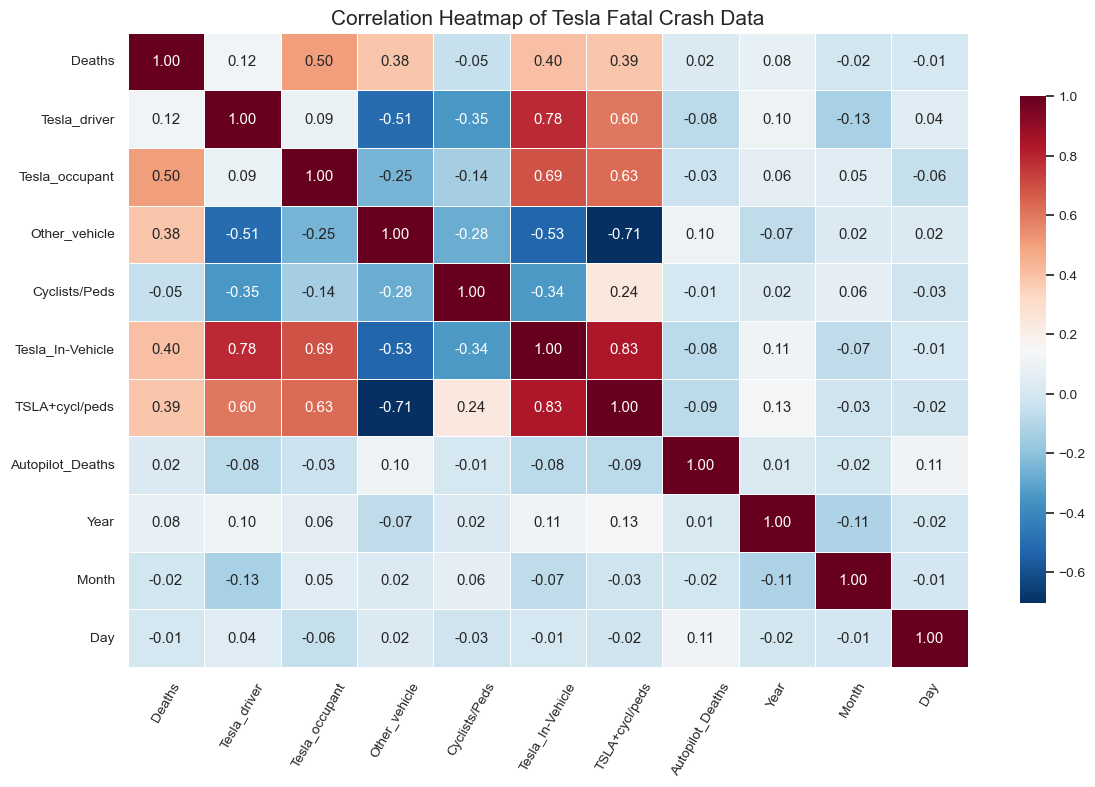

In [68]:
# Compute correlation matrix
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.set(font_scale=0.9)

# Draw the heatmap
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap of Tesla Fatal Crash Data", fontsize=15)
plt.xticks(rotation=60)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h3 style="color:#33691e; margin-top:0;">5.3 Time-Based Trends</h3>
</div>

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h4 style="color:#33691e; margin-top:0;">5.3.1 Accidents By Year</h4>
</div>

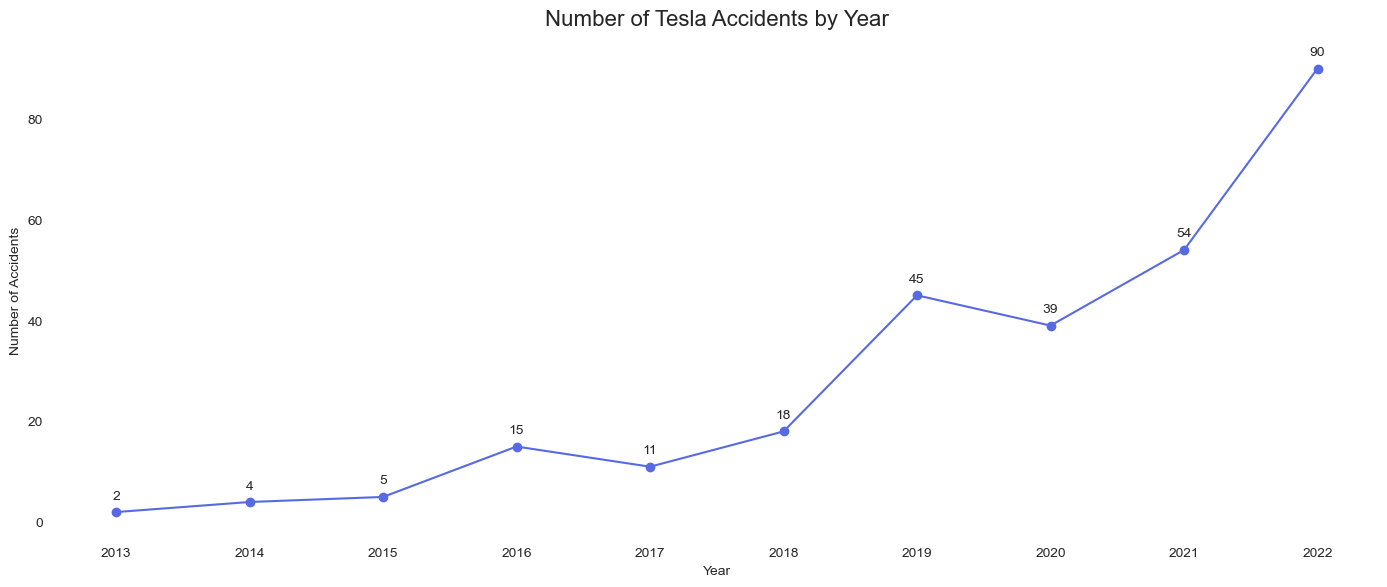

In [71]:
# Remove 2023 due to insufficient data
df_filtered = df[df["Year"] != 2023]

# Prepare the data for the plot
year_counts = df_filtered["Year"].value_counts().sort_index()
x = year_counts.index
y = year_counts.values

# Plot the data
plt.figure(figsize=(14, 6))
plt.plot(x, y, marker='o', linestyle='-', color='#586AE2')

# Whiten the background
ax = plt.gca()
ax.set_facecolor('white')

# Add value labels
for i in range(len(x)):
    plt.text(x[i], y[i] + 2, f"{y[i]:.0f}", ha='center', va='bottom', fontsize=10)

# Titles and labels
plt.title("Number of Tesla Accidents by Year", fontsize=16, pad=15)
plt.xlabel("Year", fontsize=10)
plt.ylabel("Number of Accidents", fontsize=10)
plt.xticks(ticks=x)
plt.tight_layout()
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">
The number of Tesla-related fatal accidents increased significantly after 2018, marking a concerning trend in the dataset. Specifically, fatal crashes rose from 45 in 2019 to 90 by 2023, nearly doubling within four years. This sharp rise may reflect increased vehicle adoption, expanding Autopilot availability, or broader reporting practices.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h4 style="color:#33691e; margin-top:0;">5.3.2 Accidents By Months</h4>
</div>

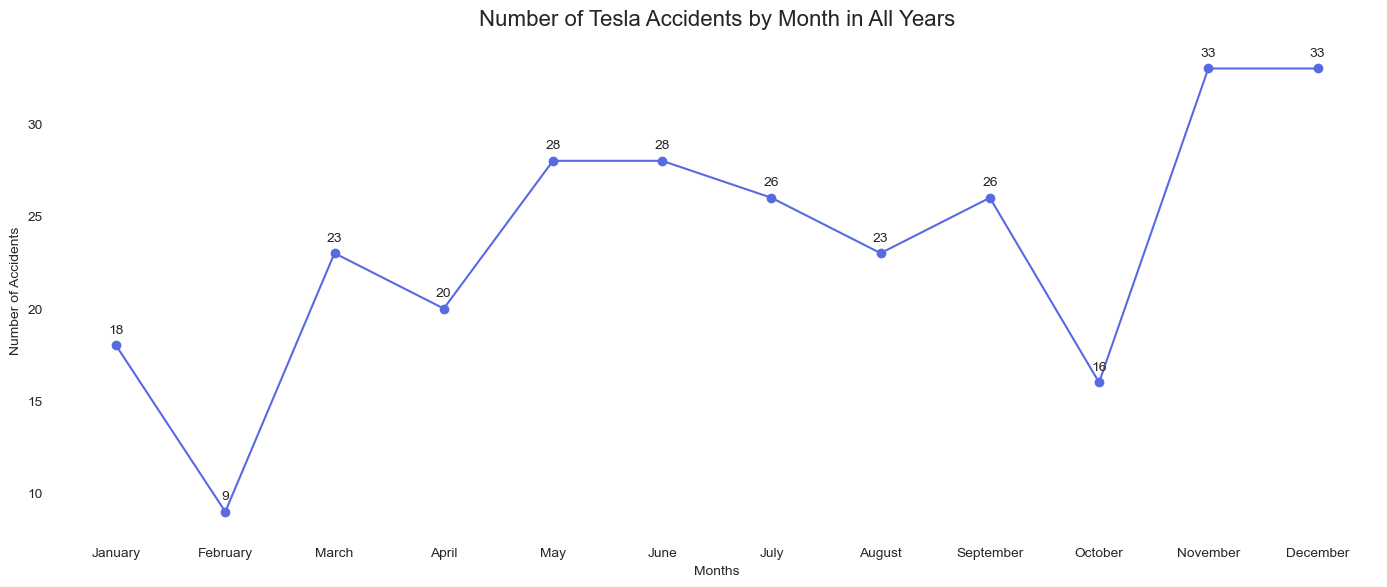

In [74]:
# Remove 2023 due to insufficient data
df_filtered = df[df["Year"] != 2023]

# Prepare the data for the plot
month_counts = df_filtered["Month"].value_counts().sort_index()
x = [calendar.month_name[i] for i in month_counts.index]
y = month_counts.values

# Plot the data
plt.figure(figsize=(14, 6))
plt.plot(x, y, marker='o', linestyle='-', color='#586AE2')

# Whiten the background
ax = plt.gca()
ax.set_facecolor('white')

# Add value labels
for i in range(len(x)):
    plt.text(x[i], y[i] + 0.5, f"{y[i]:.0f}", ha='center', va='bottom', fontsize=10)

plt.title("Number of Tesla Accidents by Month in All Years", fontsize=16, pad=15)
plt.xlabel("Months", fontsize=10)
plt.ylabel("Number of Accidents", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(False)
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">
Seasonal patterns are also evident, with November and December accounting for the highest number of fatalities (33 each), possibly due to adverse weather conditions, holiday travel surges, or reduced daylight during these months.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h4 style="color:#33691e; margin-top:0;">5.3.3 Accidents By Day</h4>
</div>

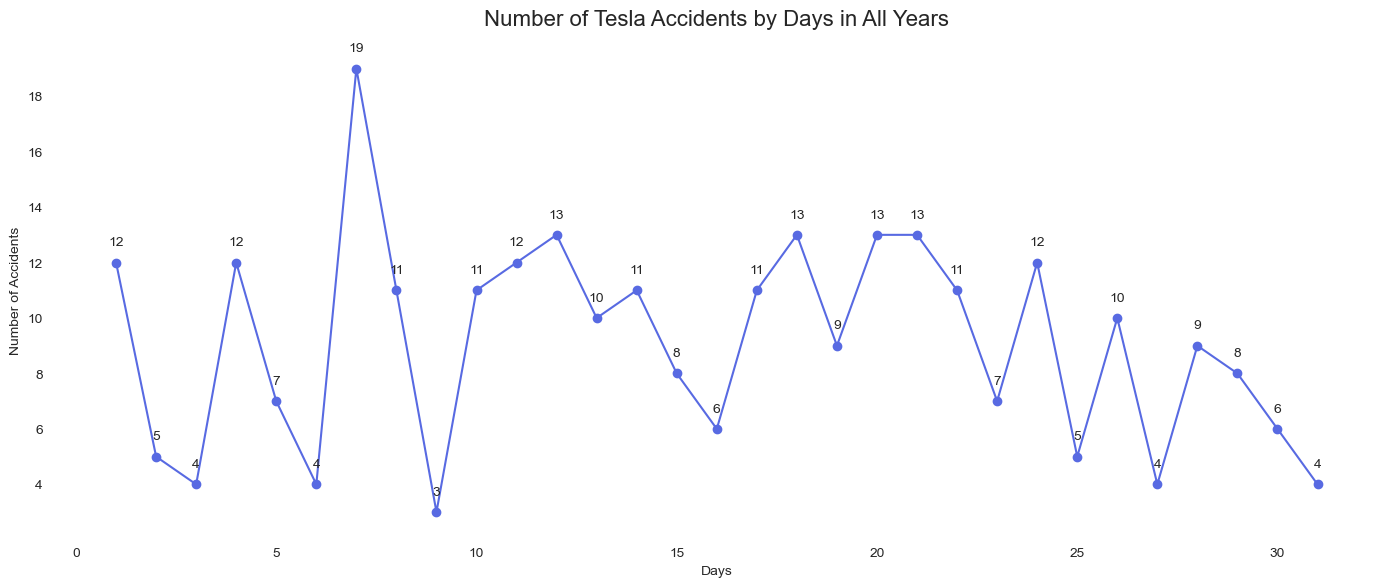

In [77]:
# Remove 2023 due to insufficient data
df_filtered = df[df["Year"] != 2023]

# Prepare the data for the plot
day_counts = df_filtered["Day"].value_counts().sort_index()
x = day_counts.index
y = day_counts.values

# Plot the data
plt.figure(figsize=(14, 6))
plt.plot(x, y, marker='o', linestyle='-', color='#586AE2')

# Whiten the background
ax = plt.gca()
ax.set_facecolor('white')

# Add value labels
for i in range(len(x)):
    plt.text(x[i], y[i] + 0.5, f"{y[i]:.0f}", ha='center', va='bottom', fontsize=10)

plt.title("Number of Tesla Accidents by Days in All Years", fontsize=16, pad=15)
plt.xlabel("Days", fontsize=10)
plt.ylabel("Number of Accidents", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(False)
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">
Interestingly, the 7th day of each month consistently recorded the highest number of fatal incidents (19) across the 2013–2022 period, suggesting an unusual temporal spike that warrants further investigation.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h3 style="color:#33691e; margin-top:0;">5.4 Location Based Analysis</h3>
</div>

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h4 style="color:#33691e; margin-top:0;">5.4.1 Accidents By Country</h4>
</div>

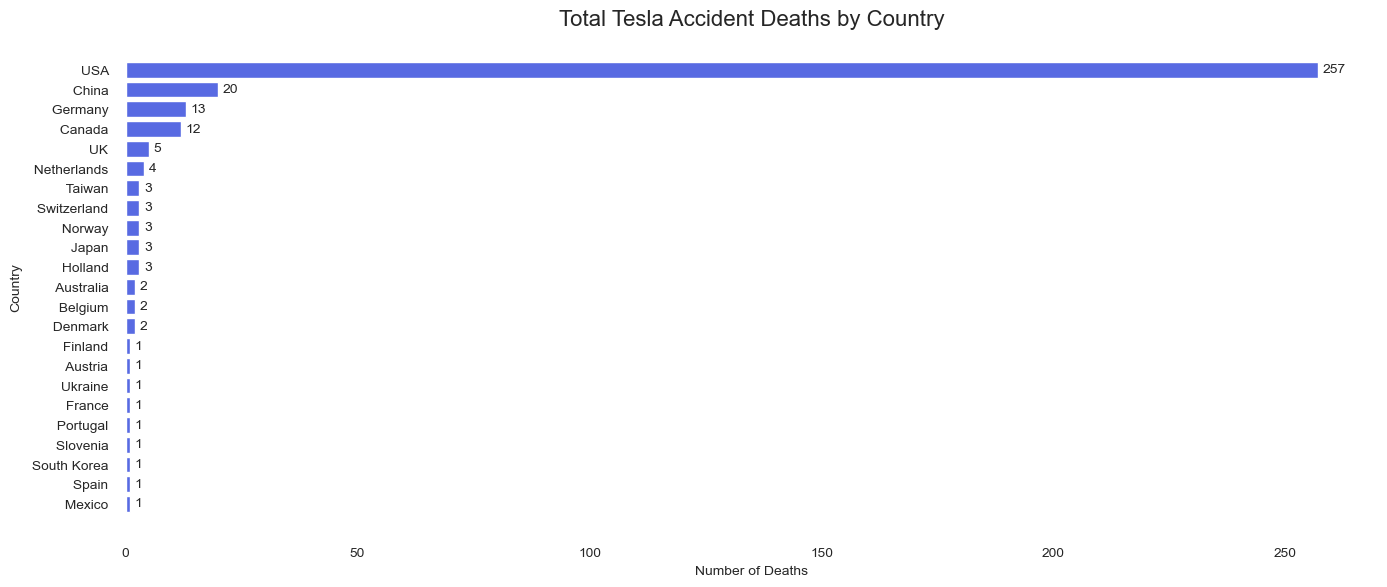

In [81]:
# Prepare data
country_deaths = df.groupby('Country')['Deaths'].sum().sort_values()

# Plot
plt.figure(figsize=(14, 6))
bars = plt.barh(country_deaths.index, country_deaths.values, color='#586AE2')

# Whiten the background
ax = plt.gca()
ax.set_facecolor('white')

# Add value labels on bars
for i, v in enumerate(country_deaths.values):
    plt.text(v + 1, i, str(v), va='center', fontsize=10)

# Titles and labels
plt.title("Total Tesla Accident Deaths by Country", fontsize=16, pad=10)
plt.xlabel("Number of Deaths", fontsize=10)
plt.ylabel("Country", fontsize=10)
plt.tight_layout()
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">
Geographically, the United States emerged as the most affected country, reporting 257 fatalities which is more than any other region, underscoring Tesla’s dominant presence in the U.S. market.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h4 style="color:#33691e; margin-top:0;">5.4.2 Accidents By U.S States</h4>
</div>

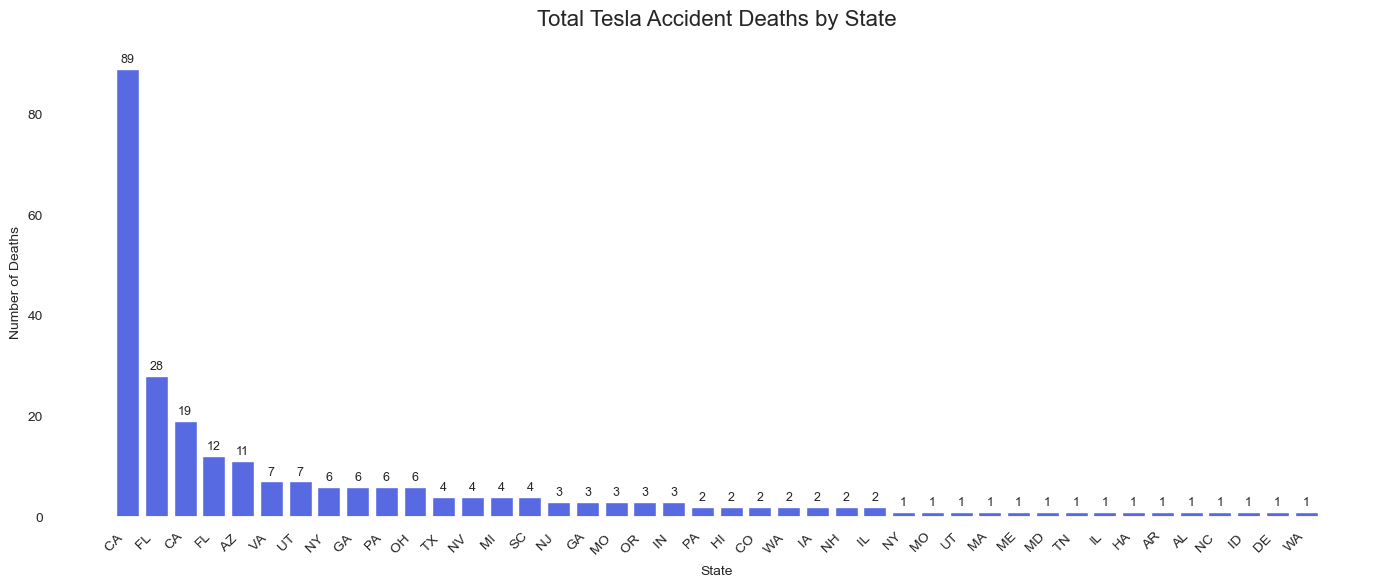

In [84]:
# Filter out invalid or zero-value states
filtered_df = df[(df['State'] != '-') & (df['Deaths'] > 0)]

# Group by state and sum Tesla in-vehicle deaths
state_deaths = (
    filtered_df.groupby('State')['Deaths']
    .sum()
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(14, 6))
bars = plt.bar(state_deaths.index, state_deaths.values, color='#586AE2')

# Whiten the background
ax = plt.gca()
ax.set_facecolor('white')

# Add value labels on bars
for i, v in enumerate(state_deaths.values):
    plt.text(i, v + 0.7, str(v), ha='center', va='bottom', fontsize=9)

# Titles and labels
plt.title("Total Tesla Accident Deaths by State", fontsize=16, pad=15)
plt.xlabel("State", fontsize=10)
plt.ylabel("Number of Deaths", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">
Within the U.S., California stood out as the most affected state with 89 total deaths, which aligns with its status as both Tesla’s production hub and one of its largest consumer markets.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h3 style="color:#33691e; margin-top:0;">5.5 Analysis Of Deaths By Category</h3>
</div>

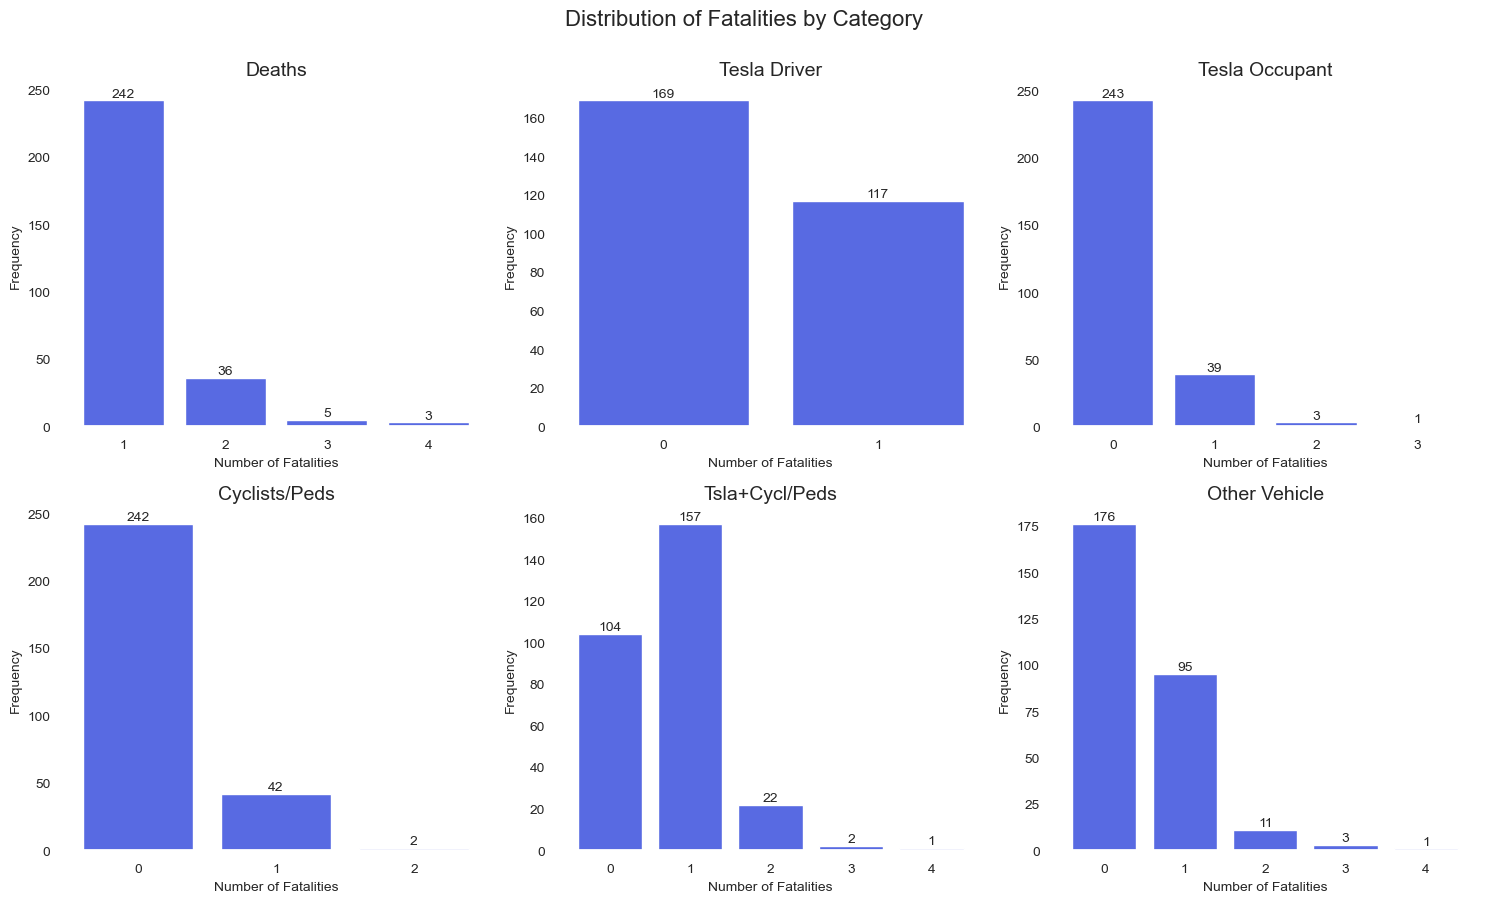

In [87]:
# Columns to analyze
death_list = ["Deaths", "Tesla_driver", "Tesla_occupant", "Cyclists/Peds", "TSLA+cycl/peds", "Other_vehicle"]

# Plot
plt.figure(figsize=(15, 9))
plt.suptitle("Distribution of Fatalities by Category", fontsize=16, y=1)

# Loop through each column and create subplots
for idx, col in enumerate(death_list, 1):
    counts = df[col].value_counts().sort_index()
    x = counts.index
    y = counts.values

    # Subplot
    plt.subplot(2, 3, idx)
    bars = plt.bar(x, y, color='#586AE2')

    # Whiten the background
    ax = plt.gca()
    ax.set_facecolor('white')

    # Add value labels on top of bars
    for i in range(len(x)):
        plt.text(x[i], y[i] + 0.3, f"{y[i]:.0f}", ha='center', va='bottom', fontsize=10)

    # Formatting each subplot
    plt.title(col.replace("_", " ").title(), fontsize=14)
    plt.xlabel("Number of Fatalities", fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.xticks(x)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">
A breakdown of fatality distributions reveals that most incidents involved single fatalities.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h3 style="color:#33691e; margin-top:0;">5.6 Accidents By Model</h3>
</div>

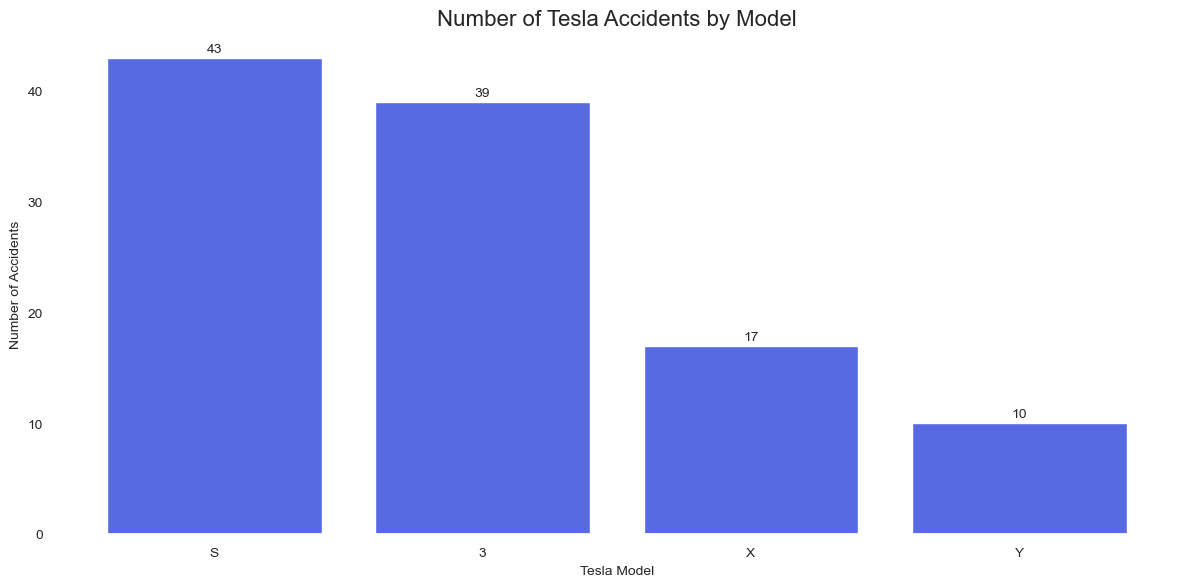

In [90]:
# Convert Model to string and strip any whitespace
df["Model"] = df["Model"].astype(str).str.strip()

# Exclude unknown and low count models
excluded_values = ['0', '1', '2']
df_filtered_model = df[~df["Model"].isin(excluded_values)]

# Group and count number of accidents per model
model_counts = df_filtered_model["Model"].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(model_counts.index, model_counts.values, color='#586AE2')

# Whiten the background
ax = plt.gca()
ax.set_facecolor('white')

# Add value labels
for i, value in enumerate(model_counts.values):
    plt.text(i, value + 0.5, f"{value}", ha='center', fontsize=10)

plt.title("Number of Tesla Accidents by Model", fontsize=16)
plt.xlabel("Tesla Model", fontsize=10)
plt.ylabel("Number of Accidents", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">
Vehicle model analysis shows that the Model S (43 fatal crashes) and Model 3 (39 fatal crashes) were most frequently involved in fatal incidents. This trend may relate to their longer presence in the market and higher sales volumes compared to newer models like the Model Y or Cybertruck.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h3 style="color:#33691e; margin-top:0;">5.7 Total Deaths By Driving Modes</h3>
</div>

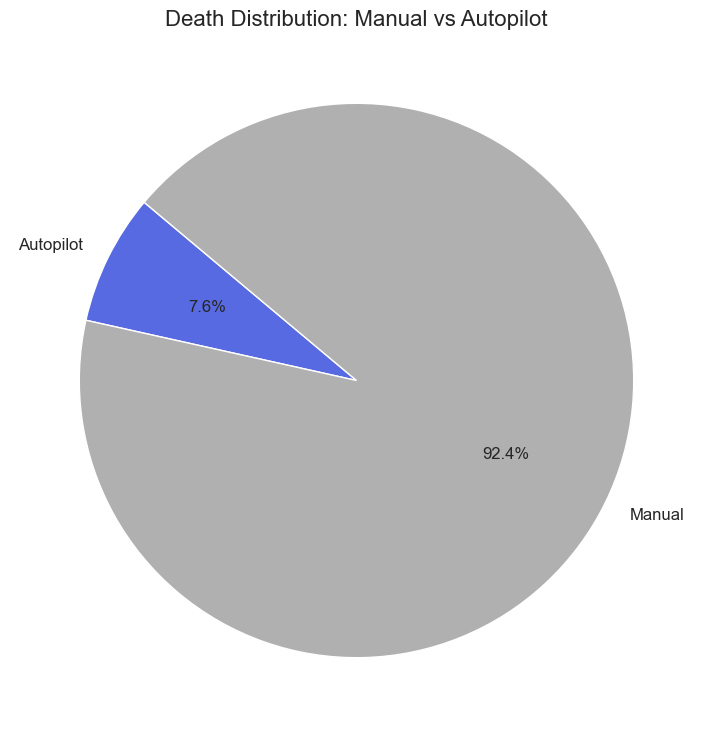

In [93]:
df["DrivingMode"] = df["Autopilot_Deaths"].apply(lambda x: "Autopilot" if x > 0 else "Manual")

# Group by driving mode and sum the deaths
mode_death_counts = df.groupby("DrivingMode")["Deaths"].sum()

# Extract labels and values
labels = mode_death_counts.index
values = mode_death_counts.values
colors = ['#586AE2', '#B0B0B0']

# Titles and labels
plt.figure(figsize=(9, 9))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 12})
plt.title("Death Distribution: Manual vs Autopilot", fontsize=16)
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">
When comparing the modes of operation, manual driving was involved in the overwhelming majority of fatal incidents (92%), while Autopilot accounted for only 8%.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h3 style="color:#33691e; margin-top:0;">5.8 Year-Wise Deaths Trend By Driving Mode</h3>
</div>

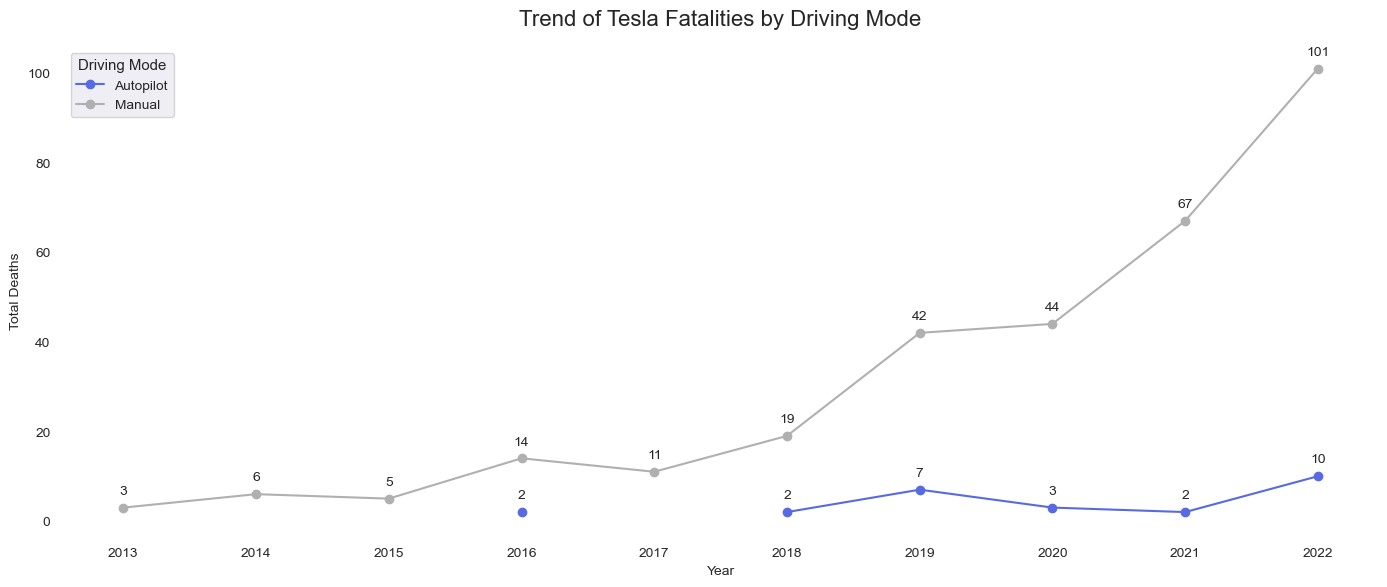

In [96]:
# Filter out 2023 due to insufficient data
df_filtered = df[df['Year'] != 2023]

# Group by year and driving mode, then sum the deaths
yearly_mode_deaths = df_filtered.groupby(['Year', 'DrivingMode'])['Deaths'].sum().unstack()

# Create the plot
fig, ax = plt.subplots(figsize=(14, 6))
yearly_mode_deaths.plot(kind='line', marker='o', ax=ax, color=['#586AE2', '#B0B0B0'])

# Whiten the background
ax.set_facecolor('white')

# Add labels to data points
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        try:
            ax.text(x, y + 5, f"{int(y)}", ha='center', va='top', fontsize=10)
        except Exception:
            continue

# Titles and labels
ax.set_title("Trend of Tesla Fatalities by Driving Mode", fontsize=16, pad=15)
ax.set_xlabel("Year", fontsize=10)
ax.set_ylabel("Total Deaths", fontsize=10)
ax.set_xticks(yearly_mode_deaths.index)
ax.legend(title="Driving Mode")
ax.grid(True)

plt.tight_layout()
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">
However, the trend analysis shows that fatalities in manual mode increased steadily after 2018, rising from 19 in 2019 to 101 in 2023 while Autopilot-related fatalities remained relatively low and fluctuated (e.g., 2 in 2019, 3 in 2021, and 10 in 2023). Although Autopilot’s crash count is lower overall, the slight increase toward the end of the timeline suggests growing exposure as adoption expands.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">6. Objective Analysis</h2>
</div>

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h3 style="color:#33691e; margin-top:0;">6.1 Objective 1: Statistically compare the severity of fatal crashes between Autopilot/FSD and Manual driving modes.</h3>
</div>

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h4 style="color:#33691e; margin-top:0;">6.1.1 Average number of deaths per crash under Autopilot vs Manual mode</h4>
</div>

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h5 style="color:#33691e; margin-top:0;">6.1.1.1 Compare Average Fatalities per Crash</h5>
</div>


In [102]:
#group by driving mode and calculate average deaths per incident

severity = df.groupby('DrivingMode')['Deaths'].agg(
    total_deaths='sum',
    total_crashes='count',
    avg_deaths_per_crash='mean'
).reset_index()
severity

,DrivingMode,total_deaths,total_crashes,avg_deaths_per_crash
0,Autopilot,26,23,1.130435
1,Manual,315,263,1.197719


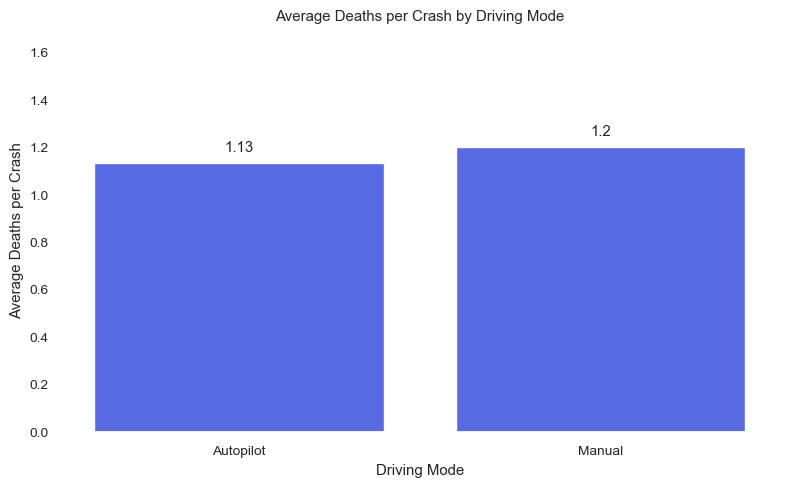

In [103]:
# Bar chart for avg deaths per crash by Driving Mode
plt.figure(figsize=(8, 5))
plt.bar(severity['DrivingMode'], severity['avg_deaths_per_crash'], color='#586AE2')

plt.title('Average Deaths per Crash by Driving Mode')
plt.xlabel('Driving Mode')
plt.ylabel('Average Deaths per Crash')
plt.ylim(0, severity['avg_deaths_per_crash'].max() + 0.5)

# Whiten the background
ax = plt.gca()
ax.set_facecolor('white')

# Add value labels on top of each bar
for index, value in enumerate(severity['avg_deaths_per_crash']):
    plt.text(index, value + 0.05, round(value, 2), ha='center')

plt.grid(False)
plt.tight_layout()
plt.show()

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h5 style="color:#33691e; margin-top:0;">6.1.1.2 Perform Statistical Test (t-test)</h5>
</div>


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">
We aim to determine whether there is a significant difference in the average number of deaths per crash between Tesla’s Autopilot and Manual driving modes.

Let:

μ₁ = Mean number of deaths per crash in Autopilot mode

μ₂ = Mean number of deaths per crash in Manual mode

* Null Hypothesis (H₀): There is no difference in the average number of deaths per crash between Autopilot and Manual driving modes.

H₀: μ₁ = μ₂

* Alternative Hypothesis (H₁): There is a difference in the average number of deaths per crash between Autopilot and Manual driving modes.

H₁: μ₁ ≠ μ₂

In [106]:
# Split deaths into two samples
deaths_autopilot = df[df['DrivingMode'] == 'Autopilot']['Deaths']
deaths_manual = df[df['DrivingMode'] == 'Manual']['Deaths']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(deaths_autopilot, deaths_manual, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

T-statistic: -0.857
P-value: 0.398


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

### Conclusion

we conducted a statistical comparison to evaluate whether fatal crashes involving Autopilot differ in severity from those in Manual driving mode. Severity was defined by the number of deaths reported per crash.

Using a two-sample t-test, we compared the average fatalities per incident across both driving modes. The results yielded a t-statistic of -0.857 and a p-value of 0.398, indicating that the observed difference is not statistically significant at the 5% significance level.

In simpler terms, there is no strong statistical evidence that Autopilot crashes result in more, or fewer fatalities per crash compared to Manual driving. Although crashes in Autopilot mode showed a slightly lower average fatality count, the difference is small and statistically inconclusive based on the current data.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h4 style="color:#33691e; margin-top:0;">6.1.2 Are crashes in Autopilot mode more likely to have higher fatality counts, controlling for location and model? Poisson Regression</h4>
</div>

In [109]:
# Build formula: Poisson regression for count of deaths
formula = "Deaths ~ C(DrivingMode) + C(Country) + C(Model) + Year"
model = smf.glm(formula=formula, data=df, family=sm.families.Poisson()).fit()

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                  286
Model:                            GLM   Df Residuals:                      255
Model Family:                 Poisson   Df Model:                           30
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.30
Date:                Mon, 04 Aug 2025   Deviance:                       43.747
Time:                        20:52:08   Pearson chi2:                     56.4
No. Iterations:                     4   Pseudo R-squ. (CS):           0.008144
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

### Interpretation

DrivingMode (Manual vs Autopilot): No significant difference in death counts (p = 0.636).

Country: None of the countries show significant effects, most coefficients are small, with high p-values.

Model: None of the Tesla models are significantly associated with higher/lower deaths.

Year: Slight upward trend in deaths per year, but not statistically significant.

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">
    
### Conclusion

The Poisson regression analysis revealed no statistically significant relationship between the number of deaths and factors such as driving mode (manual vs. autopilot), Tesla model, country, or year. This result suggests that, based on the current dataset, there is no clear evidence to support that any of these variables are strong predictors of fatalities. While a null result may seem inconclusive, it provides valuable insight by ruling out apparent trends and supports the need for either richer datasets or more advanced modeling to uncover subtler patterns. Limitations such as potential data sparsity, reporting biases, or non-linear effects may also contribute to the lack of significant findings.

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> Objective 1 Insights</h2>


The primary objective of this analysis was to statistically compare fatality rates between Tesla’s Autopilot/FSD and Manual driving modes. Using the available dataset, which includes only reported fatal incidents, we conducted two complementary analyses to evaluate differences in crash severity, defined as the number of deaths per crash.

First, a two-sample t-test was performed to compare the average fatalities per crash between driving modes. The test produced a t-statistic of -0.857 and a p-value of 0.398, indicating that the difference in average fatalities per crash is not statistically significant. In simpler terms, Autopilot crashes do not appear to result in significantly more or fewer deaths per incident than Manual mode crashes.

To account for other potentially confounding factors, we also applied a Poisson regression model. This model incorporated categorical variables for country and Tesla model, as well as the year of the incident. The coefficient for Manual driving mode was not statistically significant (p = 0.636), further confirming that driving mode does not significantly influence the number of fatalities per crash after controlling for additional context.

These results consistently suggest that, based on the current dataset, there is no strong statistical evidence of a difference in fatality severity between Autopilot and Manual driving modes.

To better assess the relative safety of Autopilot versus Manual mode, we recommend supplementing future analyses with exposure-based metrics. This would allow for a more meaningful evaluation of fatality rates per unit of driving exposure, rather than severity per incident alone.


<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> Recommendations</h2>

The analysis indicates that there is no significant difference in the severity of fatal crashes between Tesla’s Autopilot and manual driving modes. This suggests that the number of deaths per crash is similar regardless of whether Autopilot or manual control is used.

Based on this finding, Tesla can continue to develop and deploy Autopilot technology while maintaining ongoing monitoring and data collection to better understand its impact over time. It is important to gather more data and analyze specific crash situations to identify areas where the system could be improved.

Additionally, clear communication about safety performance with customers and regulators remains important. Overall, the results suggest that Autopilot’s crash severity is comparable to manual driving, but continued evaluation and refinement are advisable.

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> Limitations</h2>

There are some limitations to keep in mind when looking at these results. First, the amount of data on fatal crashes involving Autopilot may be limited, which can make it harder to find clear differences between Autopilot and manual driving. Also, the accuracy of the data depends on how well crashes and driving modes are reported, and there might be errors or missing information. The analysis only compared the average number of deaths per crash but didn’t take into account other important factors like road conditions, weather, or driver behavior that can affect crash severity. Additionally, the focus was only on fatal crashes, so it doesn’t tell us about less serious crashes or injuries. Since Autopilot technology is always changing, these findings might not apply to future versions. Finally, the statistical method used has some assumptions that might not perfectly fit the crash data. Because of these limitations, the results should be seen as a starting point, and more data and detailed analysis will be important to better understand the safety of Autopilot over time.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h3 style="color:#33691e; margin-top:0;">6.2 Objective 2: Apply natural language processing (NLP) techniques to analyze the narrative  descriptions</h3>
</div>

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h4 style="color:#33691e; margin-top:0;">6.2.1 Text Cleaning and Preprocessing</h4>
</div>

In [117]:
# Preprocessing Setup
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [118]:
#Text Cleaning Function
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = nltk.word_tokenize(text)  # Tokenize into words using default settings
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]  # Lemmatize & remove stopwords and short words
    return ' '.join(tokens)  # Join cleaned tokens into a string

#Apply Function to DataFrame
df['clean_description'] = df['Description'].apply(clean_text)

In [119]:
df[['Description', 'clean_description']].head()

,Description,clean_description
0,Tesla crashes into back of semi,tesla crash back semi
1,Tesla crashes,tesla crash
2,"Tesla hits pole, catches on fire",tesla hit pole catch fire
3,Tesla crashes and burns,tesla crash burn
4,Tesla crashes into storefront,tesla crash storefront


<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h4 style="color:#33691e; margin-top:0;">6.2.2 Topic Modeling using LDA</h4>
</div>


In [121]:
#Document-Term Matrix
vectorizer = CountVectorizer(max_df=0.85, min_df=2)
doc_term_matrix = vectorizer.fit_transform(df['clean_description'])

In [122]:
#LDA Model Training
lda_model = LatentDirichletAllocation(n_components=5, random_state=18)
lda_model.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=18)

In [123]:
#Display Topics Function
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics[f"Topic {idx+1}"] = top_words
        print(f"Topic {idx+1}: {top_words}")
    return topics

#Calling the Function
topics = display_topics(lda_model, vectorizer.get_feature_names_out(), 10)

Topic 1: ['crash', 'tesla', 'car', 'driver', 'tree', 'dy', 'later', 'run', 'red', 'duo']
Topic 2: ['tesla', 'collision', 'car', 'fire', 'driver', 'highway', 'catch', 'accident', 'two', 'intersection']
Topic 3: ['tesla', 'kill', 'drive', 'motorcyclist', 'pedestrian', 'cliff', 'go', 'wall', 'road', 'sudden']
Topic 4: ['hit', 'tesla', 'control', 'pedestrian', 'loses', 'ignites', 'run', 'motorcycle', 'pole', 'tree']
Topic 5: ['tesla', 'strike', 'rear', 'end', 'car', 'oncoming', 'traffic', 'lane', 'vehicle', 'collides']


<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h4 style="color:#33691e; margin-top:0;">6.2.3 Create word clouds</h4>
</div>

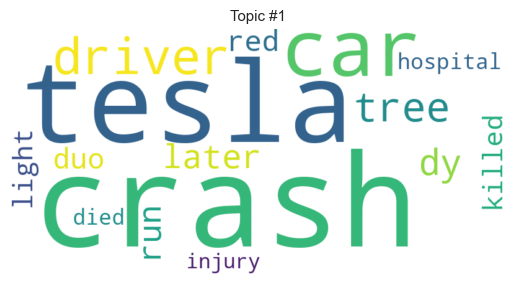

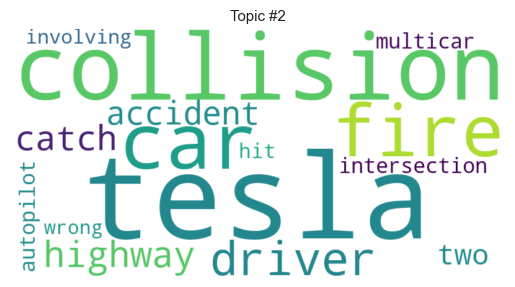

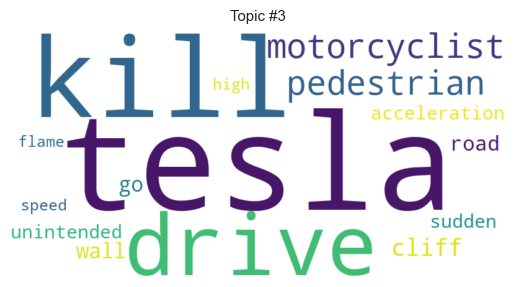

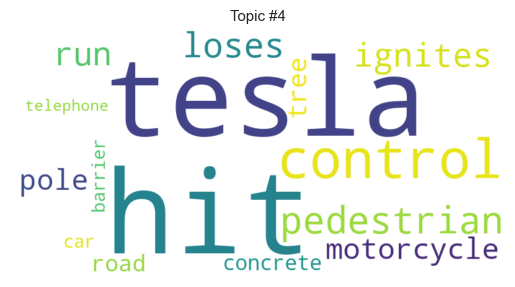

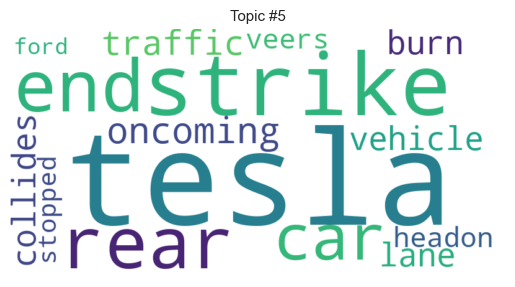

In [125]:
# Create a word cloud for each topic
for idx, topic in enumerate(lda_model.components_):
    plt.figure()
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
        {vectorizer.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[:-15 - 1:-1]})
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic #{idx+1}")
    plt.show()

In [126]:
#check where a word appears in the cleaned text
df[df['clean_description'].str.contains(r'\bduo\b', na=False)][['Description', 'clean_description']].head(50)

,Description,clean_description
59,DUI crash,duo crash
61,Tesla DUI crash,tesla duo crash
73,Tesla DUI involving another vehicle,tesla duo involving another vehicle
74,Tesla DUI hits pedestrian,tesla duo hit pedestrian
97,Multi-crash involving DUI,multicrash involving duo
105,DUI crash with parked car,duo crash parked car
109,DUI crash,duo crash


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

### Interpretation

To address the second objective of this analysis, Natural Language Processing (NLP) techniques were applied to the narrative descriptions associated with fatal crash reports. Specifically, Latent Dirichlet Allocation (LDA), an unsupervised topic modeling algorithm, was used to extract latent themes from the textual data. Prior to modeling, text data was cleaned and preprocessed through lowercasing, punctuation and digit removal, stopword filtering, and lemmatization.

The LDA model was configured to extract five topics from the dataset. Each topic represents a group of words that frequently co-occur in the crash narratives and are assumed to reflect a common underlying theme or cause. These topics were manually reviewed and interpreted based on their top keywords.

The resulting topics and their corresponding interpretations are presented in the table below:

| Topic # | Top Keywords (Summary)                           | Interpreted Theme                                        |
| ------- | ------------------------------------------------ | -------------------------------------------------------- |
| Topic 1 | crash, red, tree, fatality                 | **Signal Misjudgment**                          |
| Topic 2 | highway, collision, fire, accident               | **Excessive Speed**                      |
| Topic 3 | pedestrian, motorcyclist, cliff, sudden | **Detection Failure**          |
| Topic 4 | control, ignites, pole, motorcycle, pedestrian   | **Loss of Control** |
| Topic 5 | strike, rear, end, oncoming, traffic, lane         | **Lane Departure**      |

These topics uncover recurring crash scenarios that suggest several potential contributing factors:

* Signal Misjudgment & Red Light Violations: Drivers running red lights or misjudging signal timing, leading to off road collisions.

* Excessive Speed & Impact Severity: High speed approaches (often on highways/intersections) that amplify collision forces and post crash fires.

* Vulnerable Road User Detection Failure: Failure to detect or react to motorcyclists/pedestrians or sudden off road hazards (cliffs, walls).

* Loss of Control (Driver or System): Situations where driver distraction or Autopilot disengagement leads to control loss and secondary impacts.

* Following Distance & Lane Discipline Breakdown: Inadequate headway or lane discipline causing rear end or head on collisions.

The LDA model thus provides data-driven insights into common fatal crash patterns, which align with known safety concerns related to both human error and system limitations. These insights can be further leveraged to inform risk mitigation strategies, policy development, and enhancements in autonomous vehicle safety systems.



<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> Objective 2 Insights</h2>

By applying Natural Language Processing (NLP) techniques, specifically Latent Dirichlet Allocation (LDA) to fatal crash descriptions, we uncovered five key patterns that help explain common causes of fatal incidents: Signal Misjudgment, Excessive Speed, Detection Failure, Loss of Control, and Lane Departure.

These themes reflect a combination of human errors, environmental challenges, and potential system limitations. Signal misjudgments and failures to detect pedestrians or motorcyclists highlight areas where attention, perception, or reaction time may be critical. Incidents involving high speed, control loss, and lane departure suggest risks that can occur under both manual and automated driving, especially in complex or dynamic situations.

Overall, this analysis provides data-driven insights into recurring crash scenarios, offering valuable direction for improving safety features, refining system responses, and supporting safer decision-making in both manual and automated driving contexts.

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> Recommendations</h2>

Based on the results, several recommendations can be made to improve safety. To reduce crashes related to signal misjudgment, Tesla should consider enhancing in-cabin monitoring systems to better detect driver distraction and provide timely alerts near intersections or traffic signals. Incorporating educational prompts can also help encourage safer driving behavior. For crashes linked to excessive speed, especially on highways, refining Autopilot’s speed control, road condition awareness, and predictive braking systems could help reduce crash severity. In response to detection failures involving pedestrians and motorcyclists, Tesla can upgrade its sensor technology, particularly for urban and low-visibility conditions to improve its ability to detect vulnerable road users. To prevent incidents related to loss of control, such as collisions with poles or trees, Tesla should improve its environmental awareness systems, possibly by integrating AI to better detect road edges, elevation changes, or unexpected obstacles. Finally, as lane departure remains a common issue across both driving modes, Tesla should continue enhancing lane detection on poorly marked roads and strengthen its steering corrections and driver alert features. Together, these improvements can help reduce crash risks and enhance safety for both manual and automated driving scenarios.

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> Limitations</h2>

This NLP-based analysis has some constraints. The themes were manually labeled based on the top keywords in each topic, which involves some subjectivity. The original crash descriptions varied in detail, and missing or unclear information could affect the model’s interpretation.

Additionally, the number of topics was selected ahead of time, which may not perfectly capture the full complexity of crash scenarios. The preprocessing steps, such as removing punctuation and stopwords, might have removed useful context.

While the findings offer valuable insights, they should be considered as a starting point and paired with other data sources or analyses for a more complete understanding of crash causes.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h3 style="color:#33691e; margin-top:0;">6.3 Objective 3: Explore whether these root cause themes vary between manual and automated driving contexts, offering insight into mode-specific risk factors</h3>
</div>

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h4 style="color:#33691e; margin-top:0;">6.3.1 Assign Each Description a Topic</h4>
</div>


In [133]:
# Transform the cleaned text into the same doc-term format
doc_term_matrix = vectorizer.transform(df['clean_description'])

# Get topic probabilities for each row
topic_probs = lda_model.transform(doc_term_matrix)

# Assign the dominant topic (0 to 4)
df['topic_num'] = topic_probs.argmax(axis=1)

# Map topic numbers to meaningful theme labels
topic_labels = {
    0: "Signal Misjudgment",
    1: "Excessive Speed",
    2: "Detection Failure",
    3: "Loss of Control",
    4: "Lane Departure"
}
df['theme'] = df['topic_num'].map(topic_labels)

# Preview
df[['DrivingMode', 'theme']].head()

,DrivingMode,theme
0,Manual,Signal Misjudgment
1,Manual,Signal Misjudgment
2,Manual,Excessive Speed
3,Manual,Lane Departure
4,Manual,Signal Misjudgment


<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h4 style="color:#33691e; margin-top:0;">6.3.2 Compare Themes by Driving Modes</h4>
</div>


In [135]:
# Count themes by driving mode
theme_counts = df.groupby(['DrivingMode', 'theme']).size().unstack(fill_value=0)

# Normalize to % within each mode
theme_percents = theme_counts.div(theme_counts.sum(axis=1), axis=0) * 100
print(theme_percents.round(1))

theme        Detection Failure  Excessive Speed  Lane Departure  \
DrivingMode                                                       
Autopilot                  8.7             26.1            21.7   
Manual                    15.2             21.3            22.1   

theme        Loss of Control  Signal Misjudgment  
DrivingMode                                       
Autopilot               26.1                17.4  
Manual                  17.9                23.6  


<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h4 style="color:#33691e; margin-top:0;">6.3.3 Visualize the Difference</h4>
</div>

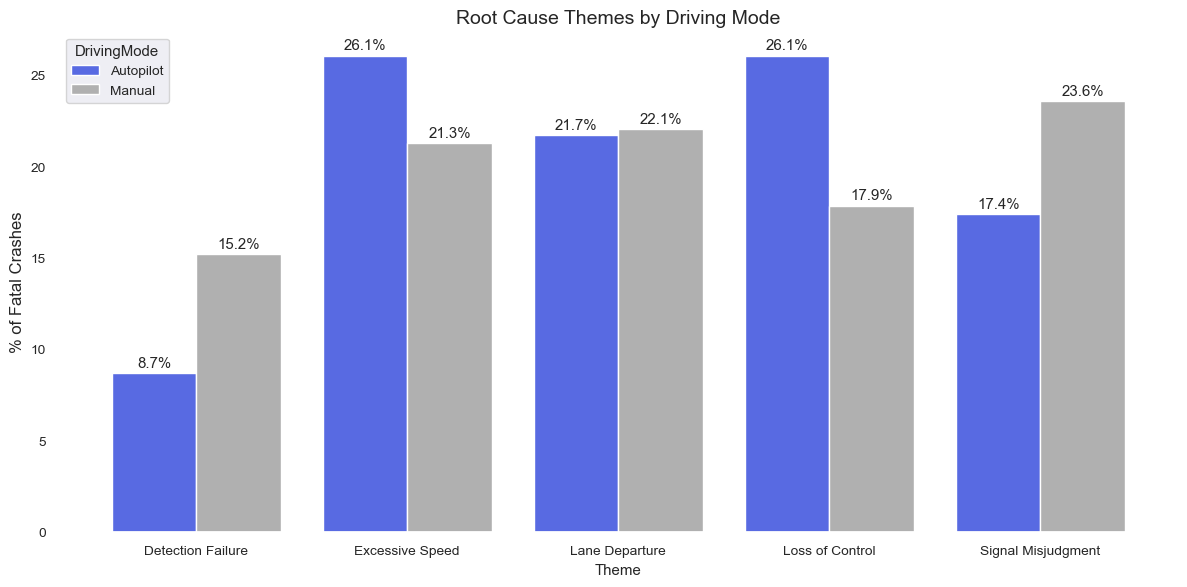

In [137]:
# Transpose data
theme_percents_T = theme_percents.T

# Plot with custom colors
ax = theme_percents_T.plot(
    kind='bar',
    color=['#586AE2', '#B0B0B0'],  # Autopilot (blue), Manual (gray)
    figsize=(12, 6),
    width=0.8
)

# Whiten the background
ax = plt.gca()
ax.set_facecolor('white')

# Add labels/title
ax.set_title('Root Cause Themes by Driving Mode', fontsize=14)
ax.set_ylabel('% of Fatal Crashes',fontsize=12)
ax.set_xlabel('Theme')
ax.tick_params(axis='x', rotation=0)

# Add percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=2)

plt.tight_layout()
plt.show()

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> Objective 3 Insights</h2>

The analysis reveals that the types of crash themes vary between Autopilot and manual driving, pointing to distinct areas of risk in each mode. Manual driving crashes are more frequently associated with Signal Misjudgment (23.6%) and Detection Failure (15.2%), indicating that human errors like ignoring traffic signals or failing to notice pedestrians and motorcyclists are major contributors. In contrast, Autopilot crashes show lower frequencies in these categories: Signal Misjudgment at 17.4% and Detection Failure at 8.7%, suggesting that automation may help reduce certain driver-related mistakes.

However, Autopilot is more often linked to Excessive Speed (26.1%) and Loss of Control (26.1%), compared to manual driving, which shows 21.3% and 17.9% respectively. This suggests that while Autopilot may offer stability in routine situations, it could face challenges in high-speed or complex environments.

Lane Departure appears at similar rates in both driving modes about 22%, indicating that this is a persistent safety concern regardless of whether the vehicle is driven manually or with Autopilot.

In summary, manual driving tends to involve more direct human errors, whereas Autopilot is more vulnerable in high-speed or control-intensive scenarios. These patterns can help guide Tesla’s safety strategy by focusing on the unique challenges of each driving mode.

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> Recommendations</h2>

Given these insights, Tesla can take targeted steps to improve safety in both Autopilot and manual driving contexts. For manual driving, the higher occurrence of Signal Misjudgment and Detection Failure suggests a need for stronger driver assistance. Tesla should continue refining in-cabin monitoring to detect distraction or inattention and provide proactive alerts near intersections or in pedestrian-heavy areas. Educational prompts or interface nudges could also promote safer manual driving habits.

In Autopilot mode, the increased rates of Excessive Speed and Loss of Control highlight opportunities to improve how the system handles high-speed scenarios. Tesla could enhance Autopilot’s speed regulation, hazard detection, and road condition awareness, especially on highways or in dynamic environments. Features such as real-time risk assessment, smarter braking, and adaptive decision-making can help prevent crashes in fast-changing conditions.

Since Lane Departure remains a common issue in both modes, Tesla should continue improving lane-keeping technology. This includes better detection on poorly marked roads, refined steering corrections, and clearer alerts when lane drift occurs. Strengthening this function across both driving modes can significantly reduce one of the most frequent types of crash scenarios.

Overall, Tesla should pursue a dual-path approach: minimizing driver-related errors in manual mode through better support tools, and refining Autopilot’s ability to safely navigate high-speed and complex driving environments. Clear user communication about system boundaries and proper usage also remains essential for ensuring safety across both driving modes.

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> Limitations</h2>

This analysis offers useful insights but comes with some limitations. First, the number of crashes in each driving mode may be unbalanced, which can affect the accuracy of comparisons. Also, theme assignment was based on interpretation, introducing some subjectivity.

The analysis does not account for other factors like weather, road conditions, or driver characteristics, which could influence crash outcomes. Additionally, the findings are based on past data and may not reflect current or future versions of Tesla’s Autopilot system. As such, results should be seen as a general guide, not a definitive conclusion.